In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import glob
import shutil
import os
import gc
print(os.listdir("../input/"))
%reload_ext autoreload
%autoreload 2
%matplotlib inline
# Any results you write to the current directory are saved as output.

['resnet34', 'dogs-vs-cats-redux-kernels-edition']


In [5]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [6]:
torch.cuda.is_available()

False

In [7]:
torch.backends.cudnn.enabled

True

In [8]:
dog_indexes = []
cat_indexes = []

In [9]:
for name in os.listdir('../input/dogs-vs-cats-redux-kernels-edition/train/'):
    if 'cat' in name:
        cat_indexes.append(name.split('.')[1])
    if 'dog' in name:
        dog_indexes.append(name.split('.')[1])

In [10]:
print ('Dog!\n',len(dog_indexes), '\nCat!\n', len(cat_indexes))

Dog!
 12500 
Cat!
 12500


In [11]:
cat_val_list = random.sample(cat_indexes, 2500)
dog_val_list = random.sample(dog_indexes, 2500)

In [12]:
os.makedirs('../working/dogcats/valid/cats/')
os.makedirs('../working/dogcats/valid/dogs/')
os.makedirs('../working/dogcats/train/cats/')
os.makedirs('../working/dogcats/train/dogs/')
os.makedirs('../working/dogcats/test/')

In [13]:
train_dir = "../input/dogs-vs-cats-redux-kernels-edition/train/"
test_dir = "../input/dogs-vs-cats-redux-kernels-edition/test/"
cat_train_dir = "../working/dogcats/train/cats/"
cat_valid_dir = "../working/dogcats/valid/cats/"
dog_train_dir = "../working/dogcats/train/dogs/"
dog_valid_dir = "../working/dogcats/valid/dogs/"
dogcats_test = "../working/dogcats/test/"

In [28]:
PATH = "../working/dogcats/"
sz=224

In [15]:
for jpgfile in iglob(os.path.join(train_dir, "cat*.jpg")):
    if jpgfile.split('.')[3] in cat_val_list:
        shutil.copy(jpgfile, cat_valid_dir)
    else:
        shutil.copy(jpgfile, cat_train_dir)

for jpgfile in iglob(os.path.join(train_dir, "dog*.jpg")):
    if jpgfile.split('.')[3] in dog_val_list:
        shutil.copy(jpgfile, dog_valid_dir)
    else:
        shutil.copy(jpgfile, dog_train_dir)
        
for jpgfile in iglob(os.path.join(test_dir, "*.jpg")):
    shutil.copy(jpgfile, dogcats_test)

In [16]:
gc.collect()

28

**LOOK AT DOG PICTURES**

In [17]:
files = os.listdir('./dogcats/train/dogs/')[:5]
files

['dog.7466.jpg',
 'dog.8526.jpg',
 'dog.6984.jpg',
 'dog.6071.jpg',
 'dog.3617.jpg']

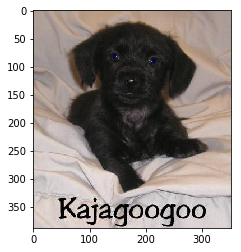

In [19]:
img = plt.imread(f'./dogcats/train/dogs/{files[0]}')
plt.imshow(img)

In [20]:
img.shape

(388, 353, 3)

In [21]:
img[:4,:4]

array([[[174, 159, 152],
        [174, 159, 152],
        [174, 159, 152],
        [174, 159, 152]],

       [[174, 159, 152],
        [174, 159, 152],
        [174, 159, 152],
        [174, 159, 152]],

       [[173, 158, 151],
        [173, 158, 151],
        [173, 158, 151],
        [173, 158, 151]],

       [[173, 158, 151],
        [173, 158, 151],
        [173, 158, 151],
        [173, 158, 151]]], dtype=uint8)

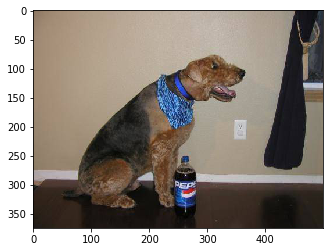

In [22]:
img = plt.imread(f'./dogcats/train/dogs/{files[1]}')
plt.imshow(img)

In [23]:
img.shape

(375, 499, 3)

In [24]:
img[:4,:4]

array([[[135, 113,  92],
        [135, 113,  92],
        [136, 114,  93],
        [138, 116,  95]],

       [[135, 113,  92],
        [136, 114,  93],
        [137, 115,  94],
        [138, 116,  95]],

       [[136, 114,  93],
        [137, 115,  94],
        [138, 116,  95],
        [139, 117,  96]],

       [[137, 115,  94],
        [137, 115,  94],
        [138, 116,  95],
        [140, 118,  97]]], dtype=uint8)

In [27]:
os.listdir('../working/dogcats/train/')

['dogs', 'cats']

In [30]:
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))

In [ ]:
learn = ConvLearner.pretrained(arch, data, precompute=True)